<a href="https://colab.research.google.com/github/sanara20221306-dot/CRM-CM-Course-Work/blob/main/CRM_CW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance
!pip install yahoofinancials

In [ ]:
#Task 1
#a
import pandas as pd
import requests

# URL of S&P 500 list
url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"

# Add User-Agent header to mimic a browser
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}

# Fetch the HTML content with headers
response = requests.get(url, headers=headers)

# Extract tables from the page using the content from the response
tables = pd.read_html(response.text)

# The S&P 500 table is the second table on the page (index 1)
sp500_table = tables[1]

# Extract ticker symbols
tickers = sp500_table["Symbol"].str.replace('.', '-', regex=False).tolist()

# Display first few tickers
tickers[:10]

/tmp/ipython-input-3682333982.py:16: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(response.text)


['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ADBE', 'AMD', 'AES', 'AFL', 'A']

In [ ]:
#b
import yfinance as yf

# Set the historical data range
start_date = "2022-01-01"
end_date = "2025-01-01"

# Download daily OHLCV data for all extracted tickers
data = yf.download(
    tickers,
    start=start_date,
    end=end_date,
    group_by='ticker',
    auto_adjust=False
)

# Save a backup of the raw dataset
data.to_csv("sp500_raw_data.csv")

# Display the first few rows
data.head()


[*********************100%***********************]  503 of 503 completed
ERROR:yfinance:
2 Failed downloads:
ERROR:yfinance:['SOLS', 'Q']: YFPricesMissingError('possibly delisted; no price data found  (1d 2022-01-01 -> 2025-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1641013200, endDate = 1735707600")')


Ticker            HUBB                                                  \
Price             Open        High         Low       Close   Adj Close   
Date                                                                     
2022-01-03  209.520004  209.820007  204.600006  205.289993  193.478546   
2022-01-04  206.630005  211.850006  204.850006  209.500000  197.446320   
2022-01-05  209.610001  211.270004  203.990005  204.229996  192.479538   
2022-01-06  204.160004  204.600006  199.479996  204.309998  192.554962   
2022-01-07  204.000000  205.000000  199.720001  200.039993  188.530594   

Ticker                    OXY                                   ...  \
Price       Volume       Open       High        Low      Close  ...   
Date                                                            ...   
2022-01-03  215087  29.209999  31.110001  29.150000  31.059999  ...   
2022-01-04  246847  31.610001  33.720001  31.410000  33.380001  ...   
2022-01-05  225762  33.189999  33.820000  31.770000  31.809999  ...   
2022-01-06  470103  33.230000  33.480000  31.920000  32.759998  ...   
2022-01-07  249535  33.029999  33.419998  32.689999  33.209999  ...   

Ticker            AMAT                                        ORLY             \
Price              Low       Close   Adj Close   Volume       Open       High   
Date                                                                            
2022-01-03  156.699997  159.929993  154.244934  5363900  46.917332  47.247334   
2022-01-04  154.509995  158.360001  152.730743  6947000  46.323334  46.946667   
2022-01-05  153.500000  153.740005  148.275009  6840100  46.717335  46.869999   
2022-01-06  151.839996  156.339996  150.782547  6576000  45.953999  46.796665   
2022-01-07  150.639999  150.809998  145.449127  6335700  46.664665  46.664665   

Ticker                                                
Price             Low      Close  Adj Close   Volume  
Date                                                  
2022-01-03  45.898666  46.396000  46.396000  5389500  
2022-01-04  46.312000  46.590668  46.590668  6015000  
2022-01-05  45.628666  45.688667  45.688667  6780000  
2022-01-06  45.810665  46.681332  46.681332  6093000  
2022-01-07  45.419334  45.483334  45.483334  5266500  

[5 rows x 3018 columns]

In [ ]:
from yahoofinancials import YahooFinancials

#Example for one stock
yahoo_fin = YahooFinancials('AAPL')
historical_data = yahoo_fin.get_historical_price_data('2022-01-01', '2025-01-01', 'daily')

print(historical_data)

{'AAPL': {'eventsData': {'dividends': {'2022-02-04': {'amount': 0.22, 'date': 1643985000, 'formatted_date': '2022-02-04'}, '2022-05-06': {'amount': 0.23, 'date': 1651843800, 'formatted_date': '2022-05-06'}, '2022-08-05': {'amount': 0.23, 'date': 1659706200, 'formatted_date': '2022-08-05'}, '2022-11-04': {'amount': 0.23, 'date': 1667568600, 'formatted_date': '2022-11-04'}, '2023-02-10': {'amount': 0.23, 'date': 1676039400, 'formatted_date': '2023-02-10'}, '2023-05-12': {'amount': 0.24, 'date': 1683898200, 'formatted_date': '2023-05-12'}, '2023-08-11': {'amount': 0.24, 'date': 1691760600, 'formatted_date': '2023-08-11'}, '2023-11-10': {'amount': 0.24, 'date': 1699626600, 'formatted_date': '2023-11-10'}, '2024-02-09': {'amount': 0.24, 'date': 1707489000, 'formatted_date': '2024-02-09'}, '2024-05-10': {'amount': 0.25, 'date': 1715347800, 'formatted_date': '2024-05-10'}, '2024-08-12': {'amount': 0.25, 'date': 1723469400, 'formatted_date': '2024-08-12'}, '2024-11-08': {'amount': 0.25, 'date'

In [ ]:
#c
#Extract 'Close' price data from the multi-index DataFrame
close_prices = data.xs('Close', level='Price', axis=1)

# Remove tickers that have more than 20% missing data
threshold = 0.8 * len(close_prices)
clean_data = close_prices.dropna(axis=1, thresh=threshold)

# Optionally, fill the remaining gaps using forward-fill and backward-fill methods
clean_data = clean_data.fillna(method='ffill').fillna(method='bfill')

# Display the shape of the cleaned data to confirm the cleaning process
print("After cleaning:", clean_data.shape)

# The original 'tickers' list may still include tickers with missing data from the initial scrape.
# To accurately track which tickers were removed due to missing data, compare the columns
# of the cleaned data to the columns of the initial close_prices DataFrame.
print("Removed tickers due to missing data:", len(close_prices.columns) - clean_data.shape[1])

After cleaning: (753, 496)
Removed tickers due to missing data: 7


/tmp/ipython-input-1383406851.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  clean_data = clean_data.fillna(method='ffill').fillna(method='bfill')


In [ ]:
# Download OHLCV + Adjusted Close
data = yf.download(tickers, start=start_date, end=end_date)

print("Shape of downloaded dataset:", data.shape)
data.head()

/tmp/ipython-input-376510686.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)
[*********************100%***********************]  503 of 503 completed
ERROR:yfinance:
2 Failed downloads:
ERROR:yfinance:['SOLS', 'Q']: YFPricesMissingError('possibly delisted; no price data found  (1d 2022-01-01 -> 2025-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1641013200, endDate = 1735707600")')


Shape of downloaded dataset: (753, 2517)


Price      Adj Close            Close                                      \
Ticker             Q SOLS           A        AAPL        ABBV        ABNB   
Date                                                                        
2022-01-03       NaN  NaN  152.320038  178.270309  116.779305  172.679993   
2022-01-04       NaN  NaN  147.170715  176.007767  116.555084  170.800003   
2022-01-05       NaN  NaN  144.649536  171.326004  117.167366  162.250000   
2022-01-06       NaN  NaN  145.155716  168.465988  116.615448  159.750000   
2022-01-07       NaN  NaN  141.291214  168.632477  116.313614  166.050003   

Price                                                      ...   Volume  \
Ticker             ABT       ACGL         ACN        ADBE  ...       WY   
Date                                                       ...            
2022-01-03  128.996124  42.362530  383.711914  564.369995  ...  3831100   
2022-01-04  125.962341  42.914051  380.969849  554.000000  ...  3089700   
2022-01-05  125.396393  42.410072  374.260681  514.429993  ...  3737600   
2022-01-06  125.377846  42.657307  356.187500  514.119995  ...  3315200   
2022-01-07  125.767502  42.856995  349.355804  510.700012  ...  3309900   

Price                                                                        \
Ticker         WYNN      XEL       XOM      XYL       XYZ      YUM      ZBH   
Date                                                                          
2022-01-03  2437800  3501100  24282400   759100   7315700  1251400  1184809   
2022-01-04  2292300  4197000  38584000   925400  14768500   935900  1400800   
2022-01-05  3439900  4166000  34033300  1090200  17546200   977900  1895715   
2022-01-06  2583200  2296000  30668500   703400  16244200   862400  1088813   
2022-01-07  1720400  2673100  23985400   765000   9426000   833700  1690230   

Price                        
Ticker        ZBRA      ZTS  
Date                         
2022-01-03  272600  2772700  
2022-01-04  346000  4664000  
2022-01-05  403700  4749400  
2022-01-06  338300  3103400  
2022-01-07  432800  2206500  

[5 rows x 2517 columns]

In [ ]:
#Task 2
#a
import pandas as pd
import numpy as np

# Load the raw data from the CSV saved in Task 1b to ensure consistent structure
# The CSV is saved with a multi-index header (Ticker, Price)
# and the Date column is the index.
data_from_csv = pd.read_csv("sp500_raw_data.csv", header=[0, 1], index_col=0)

# Convert the index to datetime objects
data_from_csv.index = pd.to_datetime(data_from_csv.index)

# Extract 'Adj Close' price data from the multi-index DataFrame
# 'Price' is the second level (level=1) when columns are (Ticker, Price)
adj_close_prices = data_from_csv.xs('Adj Close', level='Price', axis=1)

# Remove tickers that have more than 20% missing data
threshold_adj_close = 0.8 * len(adj_close_prices)
all_adj_close = adj_close_prices.dropna(axis=1, thresh=threshold_adj_close)

# Fill any remaining smaller gaps using forward-fill and backward-fill methods.
all_adj_close = all_adj_close.ffill().bfill()

# Store the list of tickers that remained after cleaning for future use in subsequent calculations.
clean_tickers = all_adj_close.columns.tolist()

# Calculate daily returns for each stock using the cleaned Adjusted Close prices
daily_returns = all_adj_close.pct_change().dropna()

# Display the shape of the cleaned Adjusted Close data and the first few rows of daily returns
print("Shape of cleaned Adjusted Close data:", all_adj_close.shape)
print("Removed tickers due to missing Adjusted Close data:", len(adj_close_prices.columns) - all_adj_close.shape[1])
print("\nFirst few rows of daily returns:")
print(daily_returns.head())

Shape of cleaned Adjusted Close data: (753, 496)
Removed tickers due to missing Adjusted Close data: 7

First few rows of daily returns:
Ticker          HUBB       OXY        MO        BK      MRNA        ON  \
Date                                                                     
2022-01-04  0.020508  0.074694  0.022097  0.035720 -0.008466  0.011116   
2022-01-05 -0.025155 -0.047034 -0.007955 -0.006931 -0.076504 -0.049753   
2022-01-06  0.000392  0.029865  0.011719  0.018611  0.003856 -0.002521   
2022-01-07 -0.020900  0.013736  0.011380  0.016803 -0.010182 -0.040000   
2022-01-10 -0.018596 -0.024993  0.015471  0.007540  0.092771  0.008674   

Ticker          CBRE       CPB      CRWD       KDP  ...       BAX       EFX  \
Date                                                ...                       
2022-01-04  0.015000  0.008688 -0.046085  0.014982  ...  0.013008  0.005669   
2022-01-05 -0.032457  0.012114 -0.052328 -0.001133  ... -0.001591 -0.022198   
2022-01-06 -0.009464  0.0169

In [ ]:
#Task 2
#b
market_data = yf.download('^GSPC', start='2022-01-01', end='2025-01-01')
market_returns = market_data['Close'].pct_change().dropna()

# Step 3: Calculate beta for each stock
beta_values = {}

for ticker in daily_returns.columns:
    stock_returns = daily_returns[ticker].dropna()

    # Align dates with market data
    aligned = pd.concat([stock_returns, market_returns], axis=1).dropna()
    stock_r, market_r = aligned.iloc[:, 0], aligned.iloc[:, 1]

    corr = stock_r.corr(market_r)
    stock_std = stock_r.std()
    market_std = market_r.std()

    beta = corr * (stock_std / market_std)
    beta_values[ticker] = beta

# Create DataFrame
beta_df = pd.DataFrame(list(beta_values.items()), columns=['Ticker', 'Beta'])
beta_df.sort_values(by='Beta', ascending=False).head(10)


/tmp/ipython-input-1527956804.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  market_data = yf.download('^GSPC', start='2022-01-01', end='2025-01-01')
[*********************100%***********************]  1 of 1 completed


,Ticker,Beta
155,COIN,2.960959
471,XYZ,2.544784
474,NVDA,2.268515
91,APP,2.261933
205,TTD,2.237123
418,PLTR,2.189588
223,MPWR,2.134131
230,AMD,2.064749
85,DASH,2.004918
391,HOOD,1.984828


In [ ]:
#Task 2
#C
# Convert volatility dictionary to DataFrame
daily_volatility = daily_returns.std()
annual_volatility = daily_volatility * np.sqrt(252)

# Create volatility DataFrame
volatility_df = pd.DataFrame({
    'Ticker': daily_volatility.index, # Use the index of daily_volatility (which are the tickers)
    'Daily Volatility': daily_volatility.values,
    'Annual Volatility': annual_volatility.values,
    'Beta': [beta_values[ticker] for ticker in daily_volatility.index] # Correctly get Beta for each ticker
})

volatility_df.sort_values(by='Annual Volatility', ascending=False).head(10)

,Ticker,Daily Volatility,Annual Volatility,Beta
155,COIN,0.060087,0.953848,2.960959
79,SMCI,0.056818,0.901957,1.855255
91,APP,0.049663,0.788374,2.261933
418,PLTR,0.043525,0.690932,2.189588
471,XYZ,0.041187,0.653825,2.544784
391,HOOD,0.041057,0.651759,1.984828
205,TTD,0.040799,0.647665,2.237123
336,TSLA,0.038618,0.613038,1.957041
4,MRNA,0.038024,0.603608,1.427285
158,EPAM,0.037945,0.602363,1.519526


In [ ]:
#Task 3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

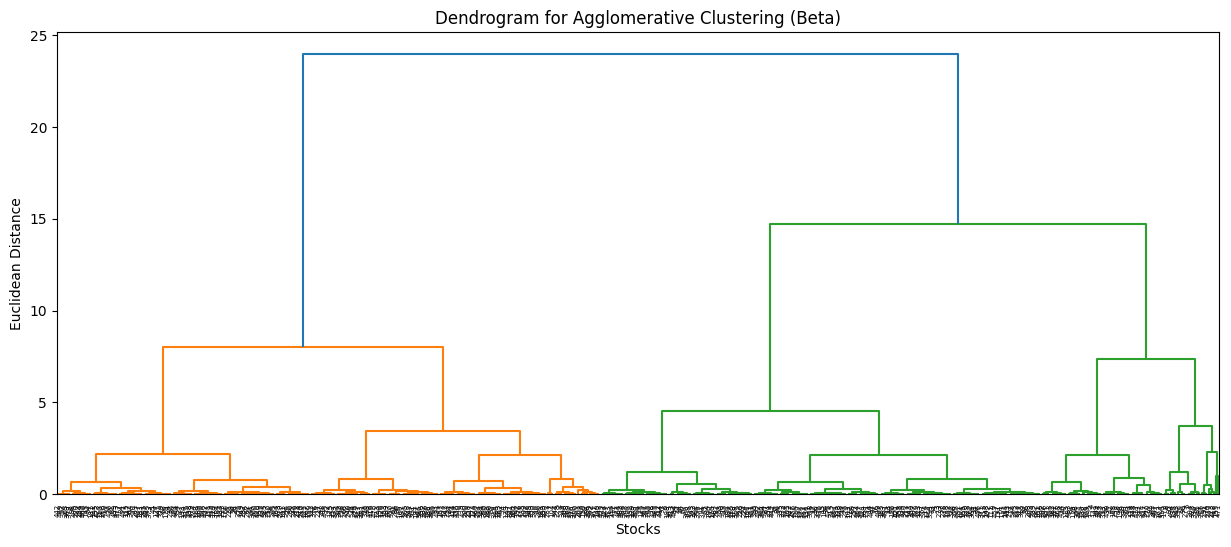

In [ ]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler # Import StandardScaler

# Scale the 'Beta' column before clustering
scaler = StandardScaler()
beta_df['Beta_scaled'] = scaler.fit_transform(beta_df[['Beta']])

plt.figure(figsize=(15, 6))
dendrogram = sch.dendrogram(sch.linkage(beta_df["Beta_scaled"].values.reshape(-1, 1), method='ward'))
plt.title("Dendrogram for Agglomerative Clustering (Beta)")
plt.xlabel("Stocks")
plt.ylabel("Euclidean Distance")
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Choose best K after observing dendrogram
K = 3   # example – update based on your dendrogram

agg = AgglomerativeClustering(
    n_clusters=K,
    metric='euclidean',
    linkage='ward'
)

# Perform clustering on the scaled beta values
# and add the cluster labels to the beta_df DataFrame.
# Use beta_df[['Beta_scaled']] as the input for clustering
beta_df["Agg_Cluster"] = agg.fit_predict(beta_df[['Beta_scaled']])

# Display the head of beta_df with the new cluster column
beta_df.head()

,Ticker,Beta,Beta_scaled,Agg_Cluster
0,HUBB,0.970793,0.091211,2
1,OXY,0.682985,-0.598785,0
2,MO,0.316702,-1.476918,0
3,BK,0.910488,-0.053366,2
4,MRNA,1.427285,1.185614,1


In [ ]:
cluster_summary = beta_df.groupby("Agg_Cluster")["Beta"].agg(["mean", "min", "max", "count"])
cluster_summary

,mean,min,max,count
Agg_Cluster,,,,
0,0.594141,0.108994,0.877683,232
1,1.650072,1.327748,2.960959,76
2,1.060620,0.883542,1.302100,188


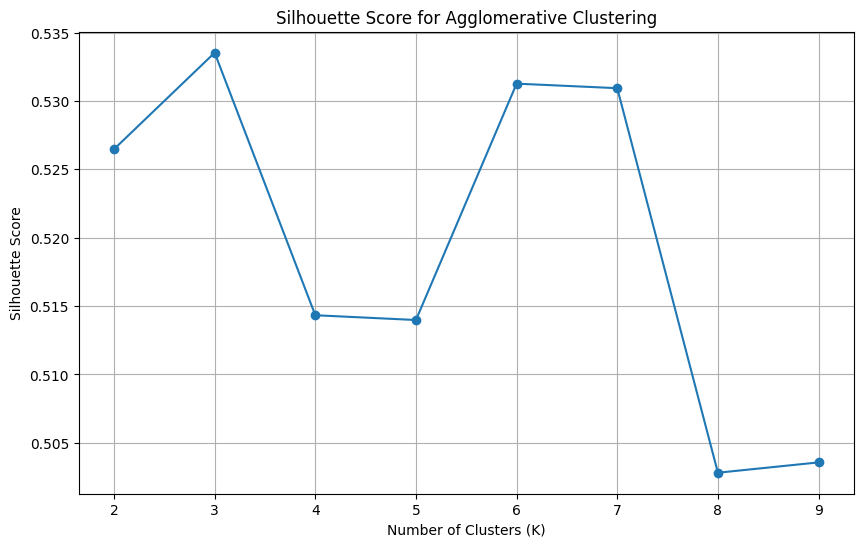

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Use the same data used for the dendrogram
X = beta_df["Beta_scaled"].values.reshape(-1, 1)

# Try silhouette scores for K = 2 to 10
K_values = range(2, 10)
silhouette_scores = []

for k in K_values:
    model = AgglomerativeClustering(
        n_clusters=k,
        metric='euclidean',
        linkage='ward'
    )
    labels = model.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Plot Silhouette Score Diagram
plt.figure(figsize=(10, 6))
plt.plot(K_values, silhouette_scores, marker='o')
plt.title("Silhouette Score for Agglomerative Clustering")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Replace with the best K you selected (example: K = 3)
K = 3

model = AgglomerativeClustering(
    n_clusters=K,
    metric='euclidean',
    linkage='ward'
)

beta_df["Agg_Cluster"] = model.fit_predict(X)

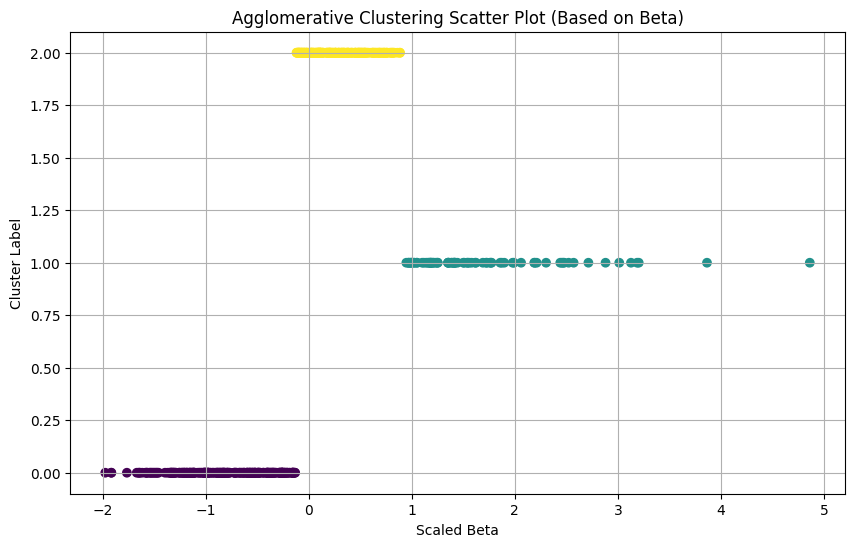

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(
    beta_df["Beta_scaled"],         # X-axis
    beta_df["Agg_Cluster"],         # Y-axis (cluster assignment)
    c=beta_df["Agg_Cluster"],
    cmap='viridis'
)

plt.title("Agglomerative Clustering Scatter Plot (Based on Beta)")
plt.xlabel("Scaled Beta")
plt.ylabel("Cluster Label")
plt.grid(True)
plt.show()

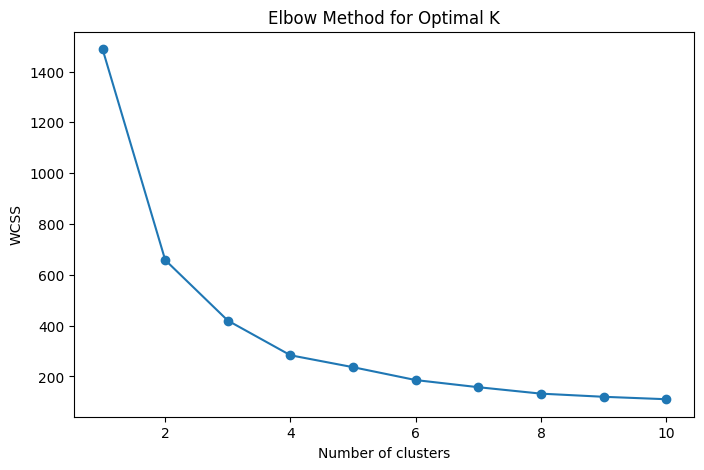

In [ ]:
#Task 4
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Feature preparation: Beta and Annual Volatility
# Use volatility_df directly, as it already contains the Beta and Annual Volatility for the cleaned tickers
features_df = volatility_df.set_index('Ticker').rename(columns={'Annual Volatility': 'Volatility'})

# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_df)

# Elbow Method to determine optimal K
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto') # Added n_init='auto' to suppress FutureWarning
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1,11), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
from sklearn.cluster import KMeans # Import KMeans
from sklearn.metrics import silhouette_score # Import silhouette_score if not already imported
from sklearn.preprocessing import StandardScaler # Import StandardScaler
import pandas as pd

# Re-create features_df and scaled_features for robustness
# This ensures the current cell has access to these variables even if previous cells were not run or failed.
# `beta_values` and `annual_volatility` are assumed to be available from previous successful executions.
features_df = pd.DataFrame({
    'Beta': [beta_values[t] for t in clean_tickers],
    'Volatility': [annual_volatility[t] for t in clean_tickers]
}, index=clean_tickers)

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_df)

sil_scores = {}

# Define K_range similar to how K_values was defined for Agglomerative Clustering
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto') # Added n_init='auto' to suppress FutureWarning
    labels = kmeans.fit_predict(scaled_features)
    sil = silhouette_score(scaled_features, labels)
    sil_scores[k] = sil

print("\nSilhouette Scores:")
for k, score in sil_scores.items():
    print(f"K = {k}: {score}")


Silhouette Scores:
K = 2: 0.5440697240454844
K = 3: 0.43711966464741786
K = 4: 0.43000791312080433
K = 5: 0.37636769246861707
K = 6: 0.4064683614625704
K = 7: 0.4037821379117565
K = 8: 0.3472671292631626
K = 9: 0.3817331632112076
K = 10: 0.35000633244541207


In [ ]:
optimal_k = max(sil_scores, key=sil_scores.get)
print("Optimal K =", optimal_k)

Optimal K = 2


In [ ]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
features_df['KMeansCluster'] = kmeans.fit_predict(scaled_features)

print("\nClustered Beta–Volatility Data:")
print(features_df.head())


Clustered Beta–Volatility Data:
          Beta  Volatility  KMeansCluster
HUBB  0.970793    0.292891              0
OXY   0.682985    0.377952              0
MO    0.316702    0.202617              0
BK    0.910488    0.250813              0
MRNA  1.427285    0.603608              1


In [ ]:
cluster_profile = features_df.groupby('KMeansCluster')[['Beta','Volatility']].describe()
print("\nCluster Profiles:")
print(cluster_profile.to_string())


Cluster Profiles:
                Beta                                                                       Volatility                                                                      
               count      mean       std       min       25%       50%       75%       max      count      mean       std       min       25%       50%       75%       max
KMeansCluster                                                                                                                                                              
0              379.0  0.762364  0.262296  0.108994  0.548195  0.789381  0.977997  1.248329      379.0  0.267825  0.050791  0.156193  0.229957  0.265142  0.298508  0.481664
1              117.0  1.484673  0.342999  0.837306  1.248046  1.426422  1.637556  2.960959      117.0  0.449719  0.108605  0.318058  0.374698  0.422388  0.487222  0.953848


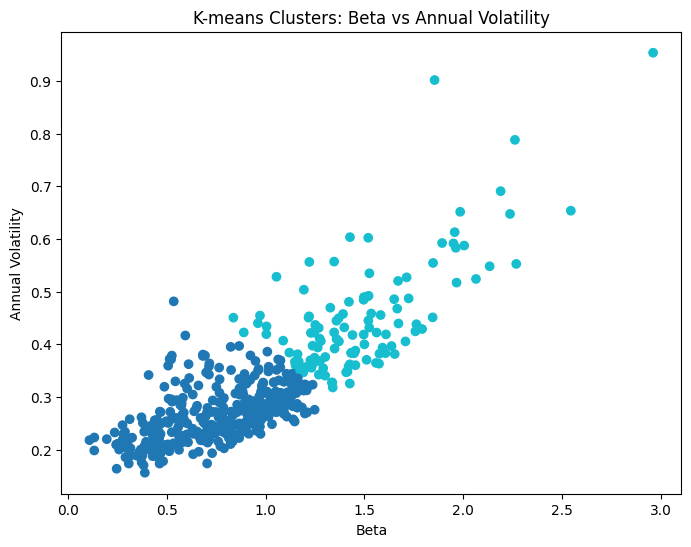

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(features_df['Beta'], features_df['Volatility'],
            c=features_df['KMeansCluster'], cmap='tab10')
plt.xlabel("Beta")
plt.ylabel("Annual Volatility")
plt.title("K-means Clusters: Beta vs Annual Volatility")
plt.show()

In [ ]:
cluster_summary = features_df.groupby('KMeansCluster').mean()
cluster_summary

,Beta,Volatility
KMeansCluster,,
0,0.762364,0.267825
1,1.484673,0.449719


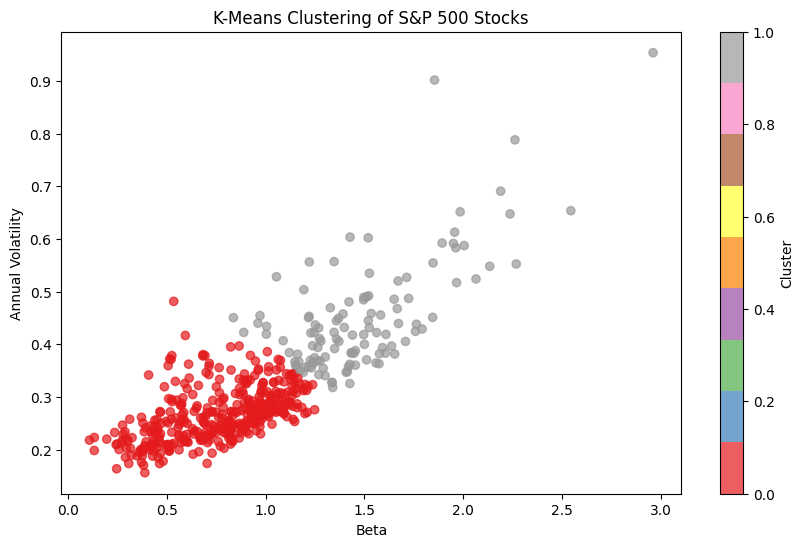

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(features_df['Beta'], features_df['Volatility'], c=features_df['KMeansCluster'], cmap='Set1', alpha=0.7)
plt.xlabel('Beta')
plt.ylabel('Annual Volatility')
plt.title('K-Means Clustering of S&P 500 Stocks')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
features_df.to_csv("kmeans_clusters_beta_volatility.csv")
from google.colab import files
files.download("kmeans_clusters_beta_volatility.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Task 5
import pandas as pd

# The following variables are expected to be available from previously executed cells:
# clean_tickers: list of tickers (from W-5WY5w5L2zZ)
# daily_returns: DataFrame of daily returns, indexed by Date, columns are tickers (from W-5WY5w5L2zZ)
# beta_values: dictionary of beta values, key=ticker, value=beta (from GVMfA4eLQDq4)
# volatility_df: DataFrame with Ticker, Daily Volatility, Annual Volatility (from PHTB5K_bYmE4)
# beta_df: DataFrame with Ticker, Beta, Beta_scaled, Agg_Cluster (from 06RYqTTTGApY or aJyhny-1Ga9Q)
# features_df: DataFrame with Beta, Volatility, KMeansCluster, indexed by ticker (from i7fvSvsAHPbf)

# Combine the metrics and cluster labels
# Ensure all source data is indexed by ticker for proper alignment

# Calculate Daily Return Mean for each ticker
daily_return_means = daily_returns.mean()

# Create Series from beta_values dictionary, indexed by ticker
betas_series = pd.Series(beta_values)

# Extract Annual Volatility as a Series, indexed by ticker
annual_volatility_series = volatility_df.set_index('Ticker')['Annual Volatility']

# Extract Agglomerative Cluster labels as a Series, indexed by ticker
agglomerative_clusters_series = beta_df.set_index('Ticker')['Agg_Cluster']

# Extract KMeans Cluster labels directly from features_df, which is already indexed by ticker
kmeans_clusters_series = features_df['KMeansCluster']

# Create the results_df, aligning all Series by their ticker index
results_df = pd.DataFrame({
    'Daily Return Mean': daily_return_means,
    'Beta': betas_series,
    'Annual Volatility': annual_volatility_series,
    'Agglomerative Cluster': agglomerative_clusters_series,
    'KMeans Cluster': kmeans_clusters_series
}).reindex(clean_tickers) # Reindex to ensure order and completeness based on clean_tickers

results_df.head()

,Daily Return Mean,Beta,Annual Volatility,Agglomerative Cluster,KMeans Cluster
HUBB,0.001184,0.970793,0.292891,2,0
OXY,0.000945,0.682985,0.377952,0,0
MO,0.000528,0.316702,0.202617,0,0
BK,0.000615,0.910488,0.250813,2,0
MRNA,-0.001582,1.427285,0.603608,1,1


In [ ]:
# Agglomerative Clustering Summary
agg_summary = results_df.groupby('Agglomerative Cluster')[['Daily Return Mean', 'Beta', 'Annual Volatility']].mean()

# K-Means Clustering Summary
kmeans_summary = results_df.groupby('KMeans Cluster')[['Daily Return Mean', 'Beta', 'Annual Volatility']].mean()

print("Agglomerative Cluster Summary:")
display(agg_summary)

print("KMeans Cluster Summary:")
display(kmeans_summary)

Agglomerative Cluster Summary:


,Daily Return Mean,Beta,Annual Volatility
Agglomerative Cluster,,,
0,0.000358,0.594141,0.251176
1,0.000570,1.650072,0.475903
2,0.000409,1.060620,0.317454


KMeans Cluster Summary:


,Daily Return Mean,Beta,Annual Volatility
KMeans Cluster,,,
0,0.000354,0.762364,0.267825
1,0.000589,1.484673,0.449719


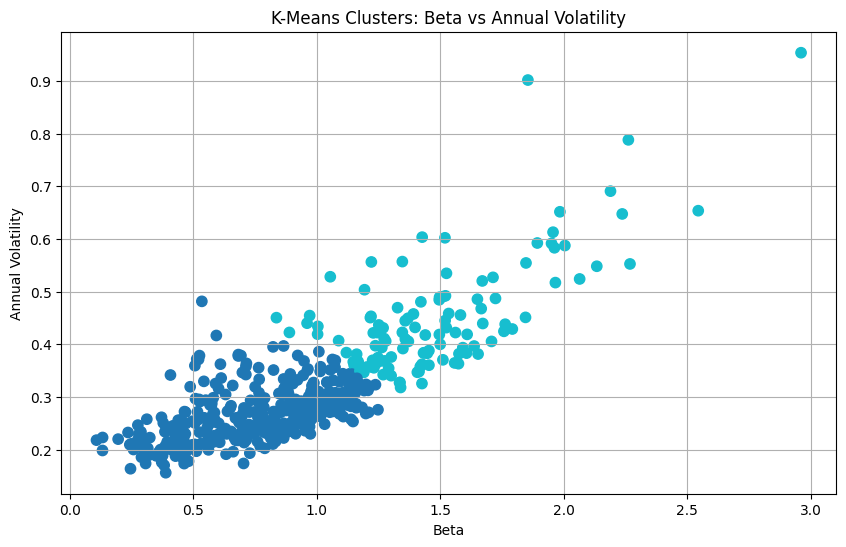

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(results_df['Beta'], results_df['Annual Volatility'],
            c=results_df['KMeans Cluster'], cmap='tab10', s=55)

plt.title("K-Means Clusters: Beta vs Annual Volatility")
plt.xlabel("Beta")
plt.ylabel("Annual Volatility")
plt.grid(True)
plt.show()

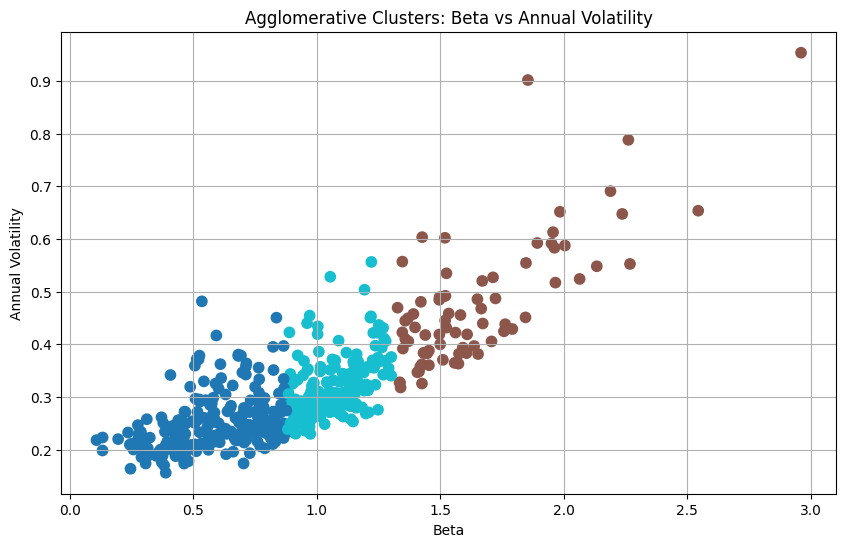

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(results_df['Beta'], results_df['Annual Volatility'],
            c=results_df['Agglomerative Cluster'], cmap='tab10', s=55)

plt.title("Agglomerative Clusters: Beta vs Annual Volatility")
plt.xlabel("Beta")
plt.ylabel("Annual Volatility")
plt.grid(True)
plt.show()

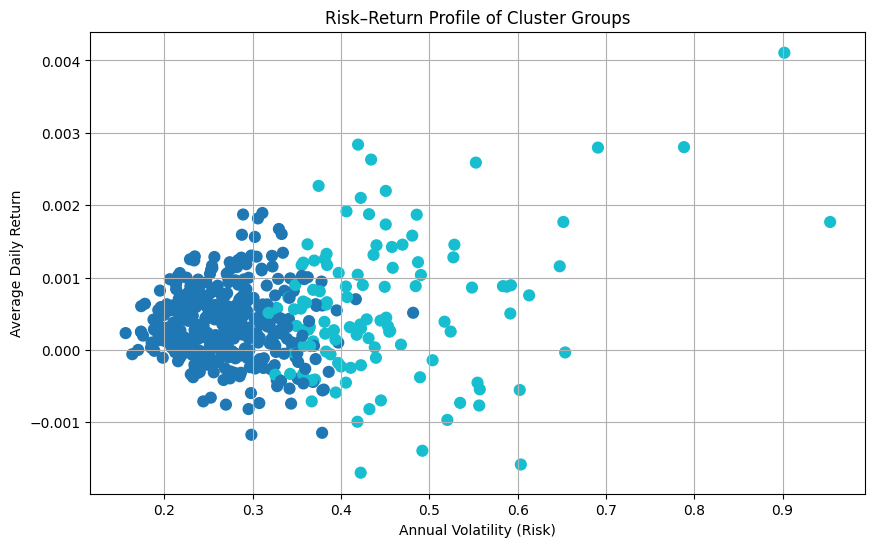

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(results_df['Annual Volatility'], results_df['Daily Return Mean'],
            c=results_df['KMeans Cluster'], cmap='tab10', s=60)

plt.title("Risk–Return Profile of Cluster Groups")
plt.xlabel("Annual Volatility (Risk)")
plt.ylabel("Average Daily Return")
plt.grid(True)
plt.show()

In [ ]:
for cluster in sorted(results_df['KMeans Cluster'].unique()):
    cluster_data = results_df[results_df['KMeans Cluster'] == cluster]
    print(f"\nCluster {cluster} Insights:")
    print(f"Average Beta: {cluster_data['Beta'].mean():.3f}")
    print(f"Average Volatility: {cluster_data['Annual Volatility'].mean():.3f}")
    print(f"Average Daily Return: {cluster_data['Daily Return Mean'].mean():.5f}")


Cluster 0 Insights:
Average Beta: 0.762
Average Volatility: 0.268
Average Daily Return: 0.00035

Cluster 1 Insights:
Average Beta: 1.485
Average Volatility: 0.450
Average Daily Return: 0.00059


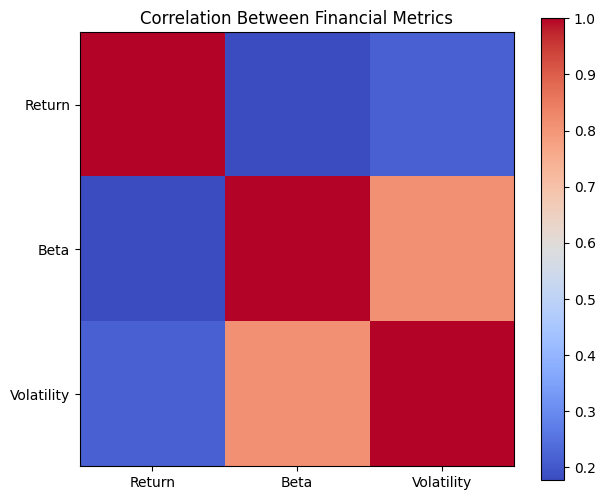

In [ ]:
plt.figure(figsize=(7,6))
plt.imshow(results_df[['Daily Return Mean','Beta','Annual Volatility']].corr(),
           cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks([0,1,2], ['Return', 'Beta', 'Volatility'])
plt.yticks([0,1,2], ['Return', 'Beta', 'Volatility'])
plt.title("Correlation Between Financial Metrics")
plt.show()

In [ ]:
#download cluster results

results_df.to_csv("clustered_stock_risk_profiles.csv")
from google.colab import files
files.download("clustered_stock_risk_profiles.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>